In [1]:
'''
    Tutorial website: https://www.springboard.com/blog/data-mining-python-tutorial/
'''

import pandas # module to clean/restructure data 
import matplotlib.pyplot  # fundamental package for data visualization
import numpy # functions to work with arrays
import scipy # a collection of tools  for statistics (regression and analysis functions)
import seaborn # function for graphing regression lines as well as distribution plots for each variable

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pandas.read_csv(r'C:\Users\silvaart\Desktop\workspace\pessoal\Programacao\AI-playing-Pong-master\Data Visualization - Data Mining\kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.isnull().any() # checking to see if any of our data has null values. If there were any, we'd drop or filter the null values

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [7]:
df.dtypes 
'''
 checking out the data types for each of our variables. 
 We want to get a sense of whether or not data is numerical (int64, float64) or not (object)
'''

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
'''
    I imported the data frame from the csv file using Pandas, and the first thing I did was make sure it reads properly. 
    I also used the “isnull()” function to make sure that none of my data is unusable for regression. 
    In real life, a single column may have data in the form of integers, strings, or NaN, all in one place – 
    meaning that you need to check to make sure the types are matching and are suitable for regression. 
    This dataset happens to have been very rigorously prepared, something you won’t see often in your own database. 
'''

'\n    I imported the data frame from the csv file using Pandas, and the first thing I did was make sure it reads properly. \n    I also used the “isnull()” function to make sure that none of my data is unusable for regression. \n    In real life, a single column may have data in the form of integers, strings, or NaN, all in one place – \n    meaning that you need to check to make sure the types are matching and are suitable for regression. \n    This dataset happens to have been very rigorously prepared, something you won’t see often in your own database. \n'

In [9]:
'''
 Simple exploratory analysis and regression results.
'''
df.describe()
'''
 Quick takeaways: We are working with a dataset that contains 21,613 observations, mean price is approximately $540k, 
 median price is approximately $450k, and the average house’s area is 2080 ft2
'''


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Text(0.5,1,'Histogram of House Prices')

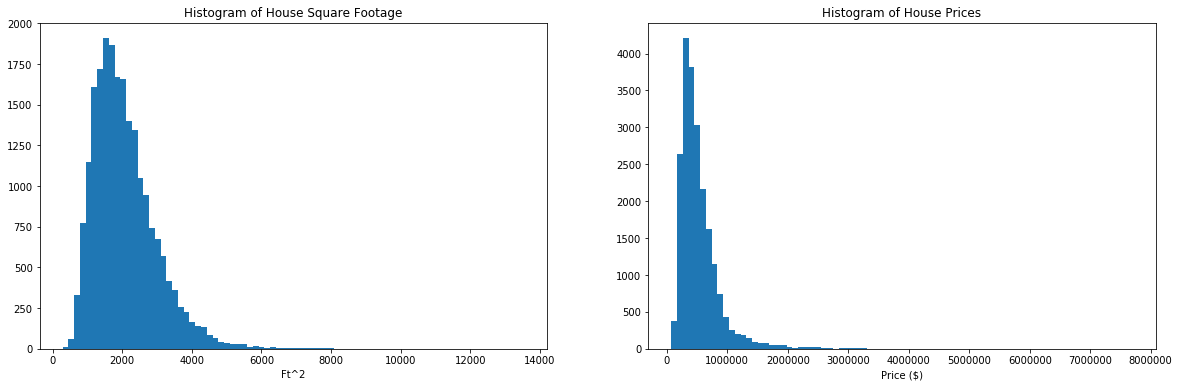

In [21]:
figure = pyplot.figure(figsize=(20, 6))
sqft = figure.add_subplot(121)
cost = figure.add_subplot(122)

sqft.hist(df.sqft_living, bins=80)
sqft.set_xlabel('Ft^2')
sqft.set_title('Histogram of House Square Footage')

cost.hist(df.price, bins=80)
cost.set_xlabel("Price ($)")
cost.set_title('Histogram of House Prices')

In [23]:
'''
    Now that we have a good sense of our data set and know the distributions of the variables we are trying to measure, 
    let’s do some regression analysis. 
    First we import statsmodels to get the least squares regression estimator function. 
    The “Ordinary Least Squares” (OLS) module will be doing the bulk of the work when it comes to crunching numbers for regression 
    in Python.
'''
import statsmodels.api
from statsmodels.formula.api import ols

'''
When you code to produce a linear regression summary with OLS with only two variables this will be the formula that you use:

An example of simple linear regression model summary output
'''
m = ols('price ~ sqft_living', df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Thu, 16 Nov 2017   Prob (F-statistic):               0.00
Time:                        11:44:39   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      

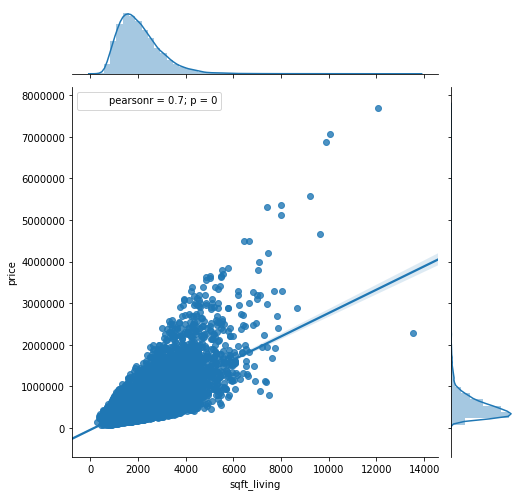

In [29]:
'''
Having the regression summary output is important for checking the accuracy of the regression model and 
data to be used for estimation and prediction – but visualizing the regression is an important step to take to communicate
the results of the regression in a more digestible format.
'''
seaborn.jointplot(x="sqft_living", y="price", data=df, kind="reg", fit_reg=True, size=7)
pyplot.show()